In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnnplus',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 KUnet ***
Working directory: /tmp/tmpjyqnxbedGP2
Using  discriminator (CNN+)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

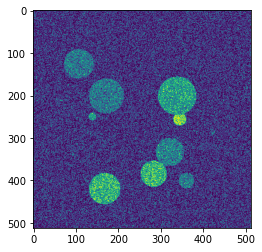

In [5]:
imshow(images[0])

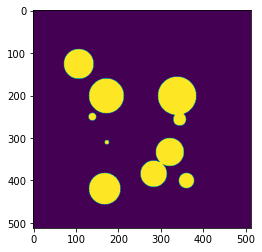

In [6]:
imshow(masks[0])

In [7]:
images = images[:6000]

In [8]:
masks = masks[:6000]

In [9]:
images.shape

(6000, 512, 512, 1)

In [10]:
masks.shape

(6000, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [12]:
R.run(images=images, masks=masks, weights=weights, runs=10, epochs=100, batch_size=64)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 24s 3s/step - loss: 0.8321 - dice_coeff: 0.1892 - val_loss: 1.1894 - val_dice_coeff: 0.1985
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.8055 - dice_coeff: 0.2005 - val_loss: 1.1437 - val_dice_coeff: 0.2010
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.7805 - dice_coeff: 0.2125 - val_loss: 1.2288 - val_dice_coeff: 0.2038
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.7527 - dice_coeff: 0.2238 - val_loss: 1.3676 - val_dice_coeff: 0.2086
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.7232 - dice_coeff: 0.2328 - val_loss: 1.4127 - val_dice_coeff: 0.2155
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6991 - dice_coeff: 0.2416 - val_loss: 1.2966 - val_dice_coeff: 0.2250
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6772 - dice_coeff: 0.2505 - val_loss: 1.1697 - va

5/5 [==============================] - 5s 1s/step - loss: 0.2893 - dice_coeff: 0.4349 - val_loss: 0.2350 - val_dice_coeff: 0.5051
Epoch 59/100
5/5 [==============================] - 5s 1s/step - loss: 0.2852 - dice_coeff: 0.4383 - val_loss: 0.2225 - val_dice_coeff: 0.5135
Epoch 60/100
5/5 [==============================] - 5s 1s/step - loss: 0.2850 - dice_coeff: 0.4382 - val_loss: 0.2138 - val_dice_coeff: 0.5189
Epoch 61/100
5/5 [==============================] - 5s 1s/step - loss: 0.2811 - dice_coeff: 0.4415 - val_loss: 0.2138 - val_dice_coeff: 0.5221
Epoch 62/100
5/5 [==============================] - 5s 1s/step - loss: 0.2843 - dice_coeff: 0.4409 - val_loss: 0.2387 - val_dice_coeff: 0.5177
Epoch 63/100
5/5 [==============================] - 5s 1s/step - loss: 0.2776 - dice_coeff: 0.4445 - val_loss: 0.2613 - val_dice_coeff: 0.5130
Epoch 64/100
5/5 [==============================] - 5s 1s/step - loss: 0.2871 - dice_coeff: 0.4413 - val_loss: 0.2685 - val_dice_coeff: 0.5108
Epoch 65/100

Epoch 43/100
6/6 [==============================] - 5s 970ms/step - loss: 0.1877 - dice_coeff: 0.5599 - val_loss: 0.1004 - val_dice_coeff: 0.7382
Epoch 44/100
6/6 [==============================] - 5s 950ms/step - loss: 0.1759 - dice_coeff: 0.5492 - val_loss: 0.1105 - val_dice_coeff: 0.7352
Model saved to: /tmp/tmpjyqnxbedGP2/kunet_1kunet_model
History saved to: /tmp/tmpjyqnxbedGP2/kunet_history_1.pkl
Testing the classifier...
Testing the discriminator...
12/12 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Replacing 56 from 169 !
D_relabeled_ 56
point ids 56
Removed: 56 Filled: 56
TOOK 405.320818901062 seconds
==== DONE LOOP 2 ====
******
Loop 3
Epoch 1/100
7/7 [==============================] - 11s 2s/step - loss: 0.1778 - dice_coeff: 0.5460 - val_loss: 0.1899 - val_dice_coeff: 0.6960
Epoch 2/100
7/7 [==============================] - 6s 907ms/step - loss: 0.1734 - dice_coeff: 0.5576 - val_loss: 0.1281 - val_dice_coeff: 0.7331
Epoch 3/100
7/7 [=

9/9 [==============================] - 7s 770ms/step - loss: 0.1069 - dice_coeff: 0.6826 - val_loss: 0.0841 - val_dice_coeff: 0.7536
Epoch 9/100
9/9 [==============================] - 7s 823ms/step - loss: 0.1061 - dice_coeff: 0.6810 - val_loss: 0.0853 - val_dice_coeff: 0.7527
Epoch 10/100
9/9 [==============================] - 7s 782ms/step - loss: 0.1040 - dice_coeff: 0.6858 - val_loss: 0.0870 - val_dice_coeff: 0.7503
Epoch 11/100
9/9 [==============================] - 7s 784ms/step - loss: 0.1041 - dice_coeff: 0.6849 - val_loss: 0.0847 - val_dice_coeff: 0.7499
Epoch 12/100
9/9 [==============================] - 7s 789ms/step - loss: 0.1022 - dice_coeff: 0.6896 - val_loss: 0.0909 - val_dice_coeff: 0.7457
Epoch 13/100
9/9 [==============================] - 7s 779ms/step - loss: 0.1017 - dice_coeff: 0.6918 - val_loss: 0.0856 - val_dice_coeff: 0.7474
Epoch 14/100
9/9 [==============================] - 7s 787ms/step - loss: 0.1037 - dice_coeff: 0.6857 - val_loss: 0.0863 - val_dice_coeff:

Epoch 3/100
12/12 [==============================] - 8s 712ms/step - loss: 0.0729 - dice_coeff: 0.7597 - val_loss: 0.0901 - val_dice_coeff: 0.7350
Epoch 4/100
12/12 [==============================] - 8s 697ms/step - loss: 0.0730 - dice_coeff: 0.7631 - val_loss: 0.0832 - val_dice_coeff: 0.7391
Epoch 5/100
12/12 [==============================] - 8s 709ms/step - loss: 0.0717 - dice_coeff: 0.7624 - val_loss: 0.0839 - val_dice_coeff: 0.7356
Epoch 6/100
12/12 [==============================] - 9s 728ms/step - loss: 0.0720 - dice_coeff: 0.7642 - val_loss: 0.0807 - val_dice_coeff: 0.7391
Epoch 7/100
12/12 [==============================] - 8s 710ms/step - loss: 0.0712 - dice_coeff: 0.7652 - val_loss: 0.0819 - val_dice_coeff: 0.7389
Epoch 8/100
12/12 [==============================] - 8s 694ms/step - loss: 0.0695 - dice_coeff: 0.7697 - val_loss: 0.0863 - val_dice_coeff: 0.7378
Epoch 9/100
12/12 [==============================] - 8s 713ms/step - loss: 0.0686 - dice_coeff: 0.7730 - val_loss: 0.0

In [13]:
R.classifier_scores

[[0.24830825626850128, 0.5288004875183105],
 [0.11316528916358948, 0.734562873840332],
 [0.1725742071866989, 0.7180061936378479],
 [0.08665461838245392, 0.7654311656951904],
 [0.09591557085514069, 0.7163313627243042],
 [0.09752606600522995, 0.717983067035675],
 [0.08904390782117844, 0.7259941101074219],
 [0.08537960797548294, 0.7492306232452393],
 [0.0570378378033638, 0.8178722262382507],
 [0.05804227665066719, 0.8157305717468262]]

In [14]:
R.discriminator_scores

[[0.8309155702590942, 0.980555534362793],
 [0.0, 1.0],
 [0.0, 1.0],
 [6.62273735851926e-10, 1.0],
 [6.62273735851926e-10, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

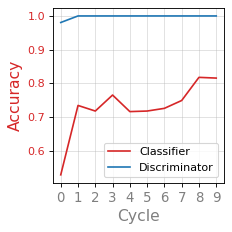

In [15]:
R.plot()

In [13]:
R.classifier_scores

[[0.18676593899726868, 0.5422838926315308],
 [0.15003475546836853, 0.676562488079071],
 [0.09907996654510498, 0.6961458325386047],
 [0.10480464994907379, 0.6899203062057495],
 [0.10205359011888504, 0.6908056735992432],
 [0.050800926983356476, 0.8224805593490601],
 [0.04899301379919052, 0.8325367569923401]]

In [14]:
R.discriminator_scores

[[0.8989142775535583, 0.8805555701255798],
 [0.1797896921634674, 0.9416666626930237],
 [0.1478504240512848, 0.9416666626930237],
 [0.17052437365055084, 0.9472222328186035],
 [0.2229500263929367, 0.9527778029441833],
 [0.6355956792831421, 0.925000011920929],
 [2.0625391006469727, 0.7638888955116272]]

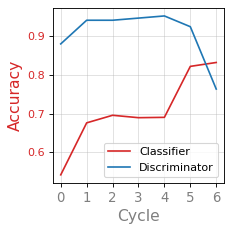

In [15]:
R.plot()

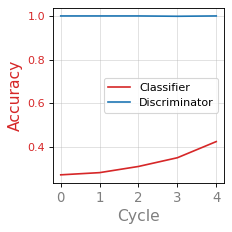

In [13]:
R.plot()

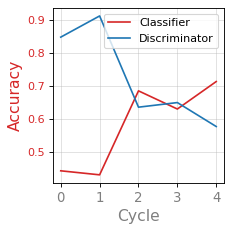

In [16]:
R.plot()